## Install the OCR tamil library

In [4]:
!pip install -q ocr_tamil==0.3.3

### Restart the run time as newly installed packages neede to be reloaded

##### Download an image for OCR testing

In [ ]:
!wget -q "https://raw.githubusercontent.com/gnana70/tamil_ocr/main/test_images/1.jpg"
!wget -q "https://raw.githubusercontent.com/gnana70/tamil_ocr/main/test_images/4.jpg"
!wget -q "https://raw.githubusercontent.com/gnana70/tamil_ocr/main/test_images/10.jpg"
!wget -q "https://raw.githubusercontent.com/gnana70/tamil_ocr/main/test_images/0.jpg"
!wget -q "https://raw.githubusercontent.com/gnana70/tamil_ocr/main/test_images/tamil_sentence.jpg"
!wget -q "https://raw.githubusercontent.com/gnana70/tamil_ocr/main/test_images/tamil_handwritten.jpg"

### Import the required packages

In [5]:
from ocr_tamil.ocr import OCR
from IPython.display import Image

C:\Users\sides\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Initialize the OCR for Text recognition

In [ ]:
ocr = OCR(detect=False)

saving to /root/.model_weights/parseq_tamil_v3.pt
Download would take several minutes


100%|██████████| 95.5M/95.5M [00:03<00:00, 26.3MB/s]


saving to /root/.model_weights/craft_mlt_25k.pth
Download would take several minutes


100%|██████████| 83.2M/83.2M [00:02<00:00, 34.5MB/s]
Downloading: "https://github.com/gnana70/tamil_ocr/raw/develop/ocr_tamil/model_weights/parseq.pt" to /root/.cache/torch/hub/checkpoints/parseq.pt
100%|██████████| 91.0M/91.0M [00:00<00:00, 189MB/s]


##### define the image_path and let's take a look at what written in image

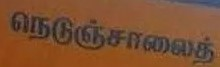

In [ ]:
image_path = r"1.jpg"
Image(image_path)

##### now we can start extrating the image using predict function

In [ ]:
texts = ocr.predict(image_path)
texts[0]

'நெடுஞ்சாலைத்'

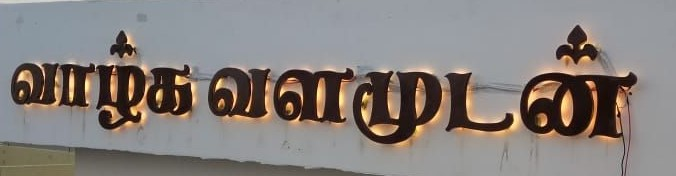

In [ ]:
image_path = r"4.jpg"
Image(image_path)

In [ ]:
texts = ocr.predict(image_path)
texts[0]

'வாழ்கவளமுடன்'

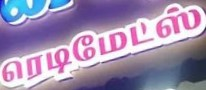

In [ ]:
image_path = r"10.jpg"
Image(image_path)

In [ ]:
texts = ocr.predict(image_path)
texts[0]

'ரெடிமேட்ஸ்'

### Text Detection and Text recognition

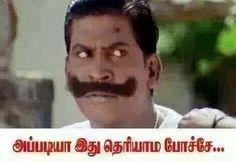

In [13]:
image_path = r"DATASET/Sticker/13.jpg"
Image(image_path)

In [7]:
ocr_detect = OCR(detect=True,batch_size=128)

saving to C:\Users\sides\.model_weights\parseq_tamil_v3.pt
Download would take several minutes


100%|██████████| 95.5M/95.5M [08:27<00:00, 188kB/s] 


In [14]:
texts = ocr_detect.predict(image_path)
texts[0]

['அப்படியா', 'இது', 'தெரியாம', 'போச்சேல்']

## Handwritten


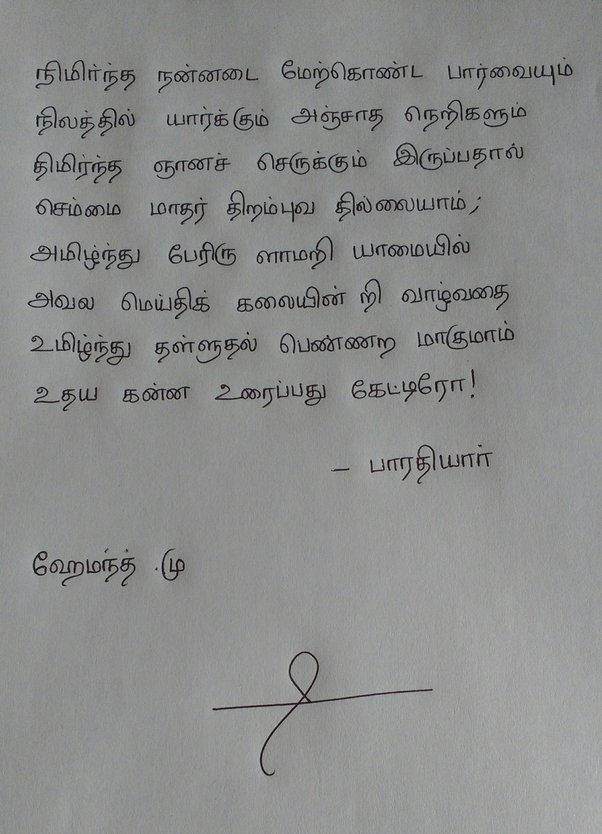

In [ ]:
image_path = r"tamil_handwritten.jpg"
Image(image_path,width=300, height=400)

In [ ]:
ocr_detect_tamil = OCR(detect=True,lang=["tamil"],batch_size=128)
texts = ocr_detect_tamil.predict(image_path)
" ".join(texts[0])

'நிமிர்ந்த நன்னடை மேற்கொண்ட பார்வையும் நிலத்தில் யார்க் கும் அஞ்சாத நெறிகளும் திமிர்ந்த ஞானச் செருக்கும் இருப்பதால் செம்மை மாதர் திறம்புவ தில்லையாம் அமிழ்ந்து பேரிரு ளாமறி யாமையில் அவல மெய்திக் கலையின்  வாழ்வதை உமிழ்ந்து தள்ளுதல் பெண்ணற மாகுமாம் உதய கன்ன உரைப்பது கேட்டிரோ பாரதியார் ஹேமந்த் ழ'

### Batch predictions

#### Only Text recognition

In [ ]:
image_path = [r"1.jpg",r"4.jpg"] # insert your own image paths here
ocr = OCR()
text_list = ocr.predict(image_path)

for text in text_list:
    print(text)

நெடுஞ்சாலைத்
வாழ்கவளமுடன்


#### Text detection and Text recognition

In [ ]:
image_path = [r"0.jpg",r"tamil_sentence.jpg"] # insert your own image paths here
ocr = OCR(detect=True)
text_list = ocr.predict(image_path)

for text in text_list:
    print(text)

['கொடைக்கானல்', 'Kodaikanal']
['', 'யற்கை', 'மூலிகைகளில்', 'இருந்து', 'ஈர்த்தெடுக்க்கப்பட்ட', 'வீரிய', 'உட்பொருட்களை', 'உள்ளடக்கி', 'எந்த', 'இரசாயன', 'சேர்க்கைகளும்', 'இல்லாமல்', 'உருவாக்கப்பட்ட', 'இந்தியாவின்', 'முதல்', 'சித்த', 'தயாரிப்பு']


## Advanced usage

#### With confidence score informations

In [ ]:
image_path = [r"0.jpg",r"tamil_sentence.jpg"] # insert your own image paths here
ocr = OCR(detect=True,details=1)
text_list = ocr.predict(image_path)

for text in text_list:
    print(text)

[('கொடைக்கானல்', 0.9999871253967285), ('Kodaikanal', 0.9984925389289856)]
[('', 0.0), ('யற்கை', 0.999935507774353), ('மூலிகைகளில்', 0.9999879002571106), ('இருந்து', 0.9999895095825195), ('ஈர்த்தெடுக்க்கப்பட்ட', 0.9999856948852539), ('வீரிய', 0.9999885559082031), ('உட்பொருட்களை', 0.9999851584434509), ('உள்ளடக்கி', 0.999985933303833), ('எந்த', 0.9999914169311523), ('இரசாயன', 0.9999831914901733), ('சேர்க்கைகளும்', 0.9999924898147583), ('இல்லாமல்', 0.999994695186615), ('உருவாக்கப்பட்ட', 0.9999934434890747), ('இந்தியாவின்', 0.999993622303009), ('முதல்', 0.9999930262565613), ('சித்த', 0.999988317489624), ('தயாரிப்பு', 0.9997835159301758)]


#### With confidence and Bounding box information

In [ ]:
image_path = [r"0.jpg",r"tamil_sentence.jpg"] # insert your own image paths here
ocr = OCR(detect=True,details=2,batch_size=128)
text_list = ocr.predict(image_path)

for text in text_list:
    print(text)

[('கொடைக்கானல்', 0.9999871253967285, (array([[126.463135, 132.89607 ],
       [789.092   , 148.9598  ],
       [787.2706  , 224.09142 ],
       [124.641785, 208.0277  ]], dtype=float32), 1)), ('Kodaikanal', 0.9984925389289856, (array([[318.28687, 230.75328],
       [796.7251 , 236.19006],
       [795.7733 , 319.95197],
       [317.33508, 314.5152 ]], dtype=float32), 2))]
[('', 0.0, (array([[25.359375, 21.978125],
       [47.3375  , 21.978125],
       [47.3375  , 43.95625 ],
       [25.359375, 43.95625 ]], dtype=float32), 1)), ('யற்கை', 0.999935507774353, (array([[ 50.71875 ,  11.834375],
       [165.68124 ,  11.834375],
       [165.68124 ,  50.71875 ],
       [ 50.71875 ,  50.71875 ]], dtype=float32), 1)), ('மூலிகைகளில்', 0.9999879002571106, (array([[173.35197  ,  11.627055 ],
       [390.09625  ,   5.7691035],
       [391.07983  ,  42.1595   ],
       [174.33551  ,  48.017452 ]], dtype=float32), 1)), ('இருந்து', 0.9999895095825195, (array([[398.9875  ,  11.834375],
       [512.2594  ,